In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [3]:
################ SERVER ################

In [4]:
dataDir = '/Users/still/Downloads/Exported'

# Areas
expressServerEmployeesAreas = pd.read_csv(dataDir + '/expressServerEmployeesAreas.csv', sep=',', decimal= ',')
expressServerDepartmentsAreas = pd.read_csv(dataDir + '/expressServerDepartmentsAreas.csv', sep=',', decimal= ',')

my_pal = {"Express":"#4287f5"}#, "Nest":"#ff9f0f", "Fastify":"#03a341", "Koa":"#fa344f"}
my_pal2 = ["#4287f5"]#, "#ff9f0f", "#03a341", "#fa344f"]

expressServerEmployeesAreas

,area,run
0,68.84999999999998,1
1,68.64999999999999,2
2,70.89999999999998,3
3,68.39999999999998,4
4,68.29999999999998,5
5,68.6,6
6,68.64999999999998,7
7,68.39999999999999,8
8,67.94999999999999,9
9,68.39999999999999,10


In [5]:
for i in range (0, 31):
    expressServerEmployeesAreas['area'][i] = round(float(expressServerEmployeesAreas['area'][i]),1)
    expressServerDepartmentsAreas['area'][i] = round(float(expressServerDepartmentsAreas['area'][i]),1)
    
expressServerEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_27628\3137143010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expressServerEmployeesAreas['area'][i] = round(float(expressServerEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_27628\3137143010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expressServerDepartmentsAreas['area'][i] = round(float(expressServerDepartmentsAreas['area'][i]),1)


,area,run
0,68.8,1
1,68.6,2
2,70.9,3
3,68.4,4
4,68.3,5
5,68.6,6
6,68.6,7
7,68.4,8
8,67.9,9
9,68.4,10


In [6]:
m1c = expressServerEmployeesAreas['area'].mean()
m1s = expressServerDepartmentsAreas['area'].mean()

d = {'experiment': ["Express"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [7]:
df2 = df
df2 = pd.melt(df2, id_vars="experiment", var_name="means", value_name="Mean area")
df2

,experiment,means,Mean area
0,Express,meanAreaEmp,65.435484
1,Express,meanAreaDept,145.161290


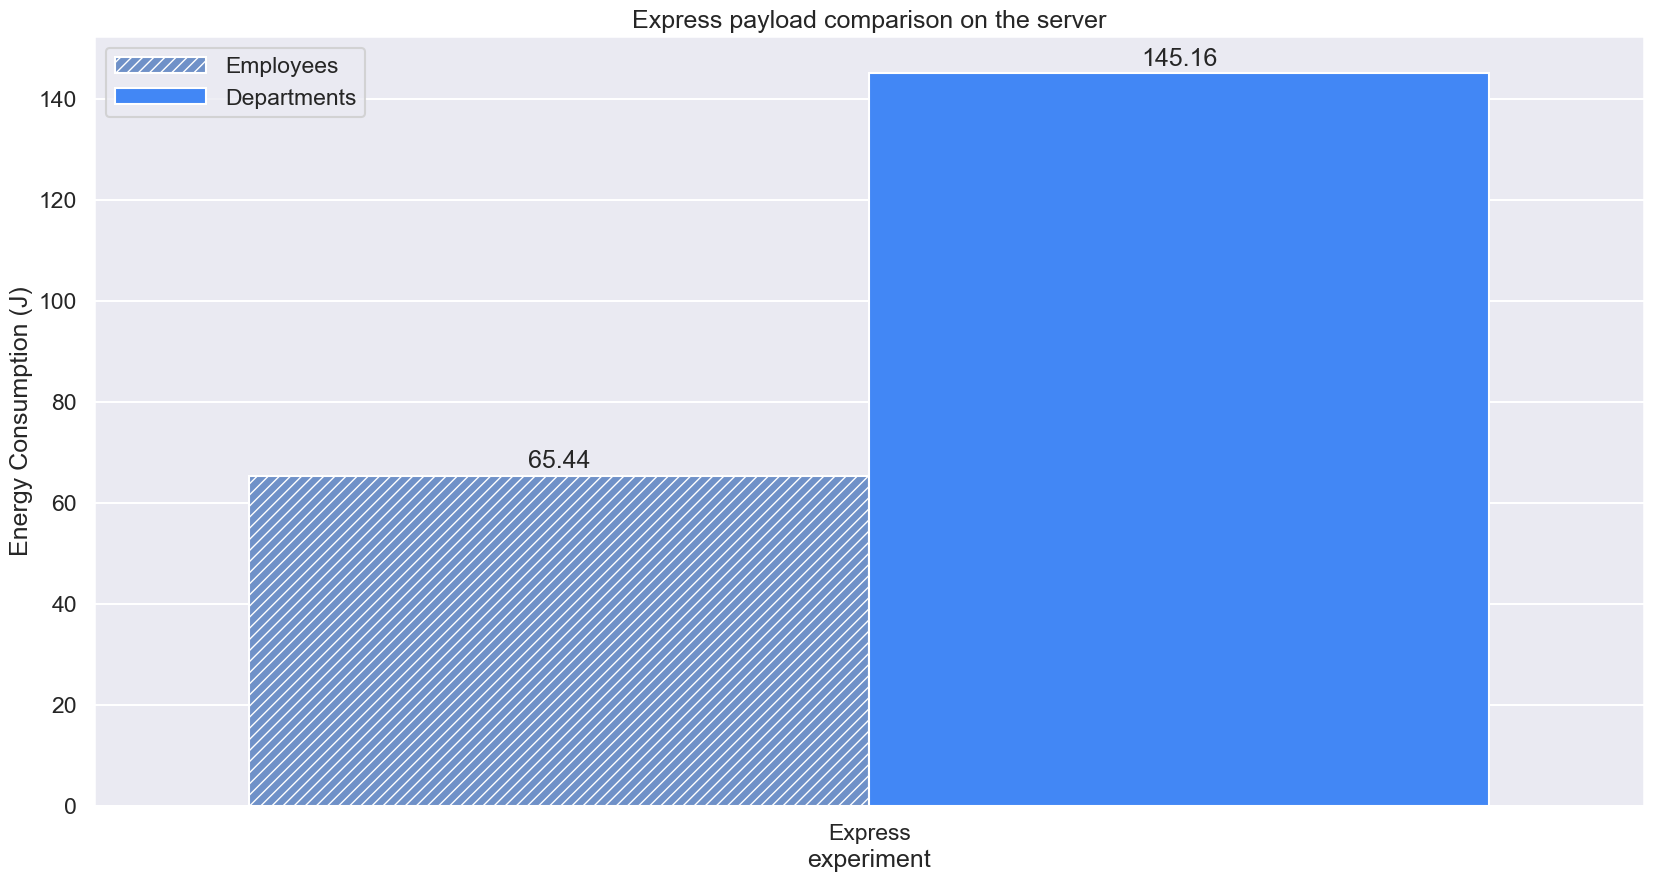

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df2)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Express payload comparison on the server")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
          handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In [9]:
################ CLIENT ################

In [10]:
# Areas
expressClientEmployeesAreas = pd.read_csv(dataDir + '/expressClientEmployeesAreas.csv', sep=',', decimal= ',')
expressClientDepartmentsAreas = pd.read_csv(dataDir + '/expressClientDepartmentsAreas.csv', sep=',', decimal= ',')

expressClientEmployeesAreas

,area,run
0,67.65,1
1,67.8,2
2,70.35,3
3,68.19999999999999,4
4,68.30000000000001,5
5,67.25,6
6,67.25,7
7,67.65,8
8,67.2,9
9,66.55,10


In [11]:
for i in range (0, 31):
    expressClientEmployeesAreas['area'][i] = round(float(expressClientEmployeesAreas['area'][i]),1)
    expressClientDepartmentsAreas['area'][i] = round(float(expressClientDepartmentsAreas['area'][i]),1)
    
expressClientEmployeesAreas

C:\Users\still\AppData\Local\Temp\ipykernel_27628\69927576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expressClientEmployeesAreas['area'][i] = round(float(expressClientEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_27628\69927576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expressClientDepartmentsAreas['area'][i] = round(float(expressClientDepartmentsAreas['area'][i]),1)


,area,run
0,67.7,1
1,67.8,2
2,70.3,3
3,68.2,4
4,68.3,5
5,67.2,6
6,67.2,7
7,67.7,8
8,67.2,9
9,66.5,10


In [12]:
m1c = expressClientEmployeesAreas['area'].mean()
m1s = expressClientDepartmentsAreas['area'].mean()

d = {'experiment': ["Express"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [13]:
df3 = df
df3 = pd.melt(df3, id_vars="experiment", var_name="means", value_name="Mean area")
df3

,experiment,means,Mean area
0,Express,meanAreaEmp,64.825806
1,Express,meanAreaDept,143.112903


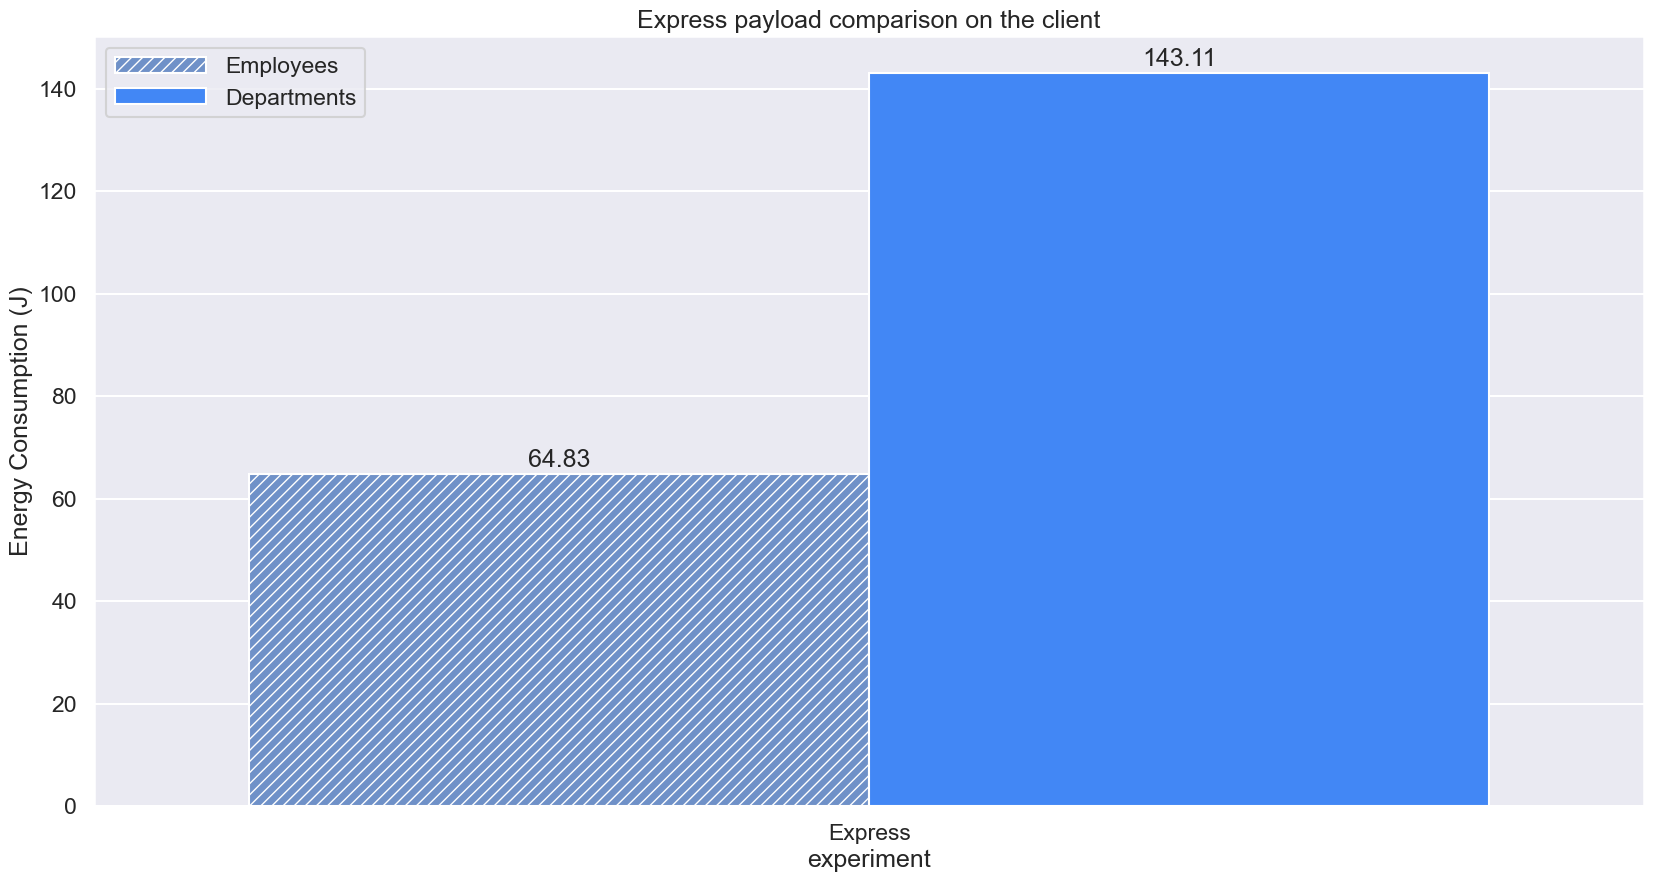

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df3)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Express payload comparison on the client")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
            handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()